# HR Analytics Report

This report explores employee data to uncover trends related to department-wise performance, leave behavior, and attrition.  
The insights help in identifying potential improvement areas in workforce management.


   EmployeeID              Name  Department    JoinDate   LeaveDate  \
0        1001   Heather Mcguire  Operations  2024-04-22  2025-05-14   
1        1003  Virginia Ramirez     Finance  2023-04-17  2023-05-09   
2        1005      Amy Marshall       Sales  2022-01-13  2023-12-19   
3        1006      Jacob Santos   Marketing  2021-01-14  2021-07-16   
4        1007    Jeffrey Butler   Marketing  2023-04-02  2025-04-17   

   PerformanceScore  LeaveTaken  
0              3.43          19  
1              2.64          20  
2              2.83           1  
3              3.24          13  
4              4.05          20  
Missing values in each column:

EmployeeID          0
Name                0
Department          0
JoinDate            0
LeaveDate           0
PerformanceScore    0
LeaveTaken          0
dtype: int64
         EmployeeID             Name Department             JoinDate  \
count     25.000000               25         25                   25   
unique          NaN       

C:\Users\DELL\AppData\Local\Temp\ipykernel_37436\1097186315.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


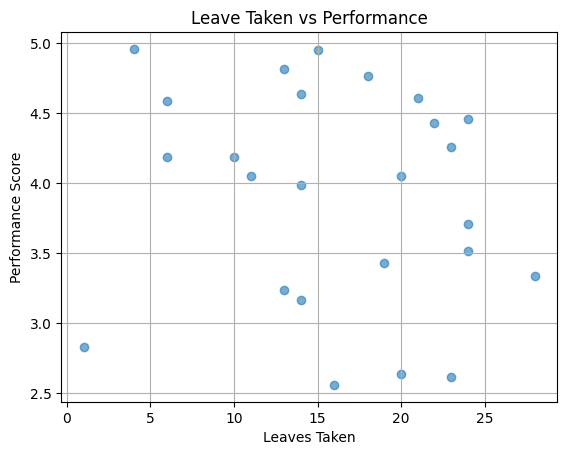

C:\Users\DELL\AppData\Local\Temp\ipykernel_37436\1097186315.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_perf.values, y=dept_perf.index, palette='viridis')


               Name  Department  LeaveTaken
5       Eric Zuniga          HR          28
14   Virginia Salas  Operations          24
16   Kendra Fischer     Finance          24
17   Barbara Keller       Sales          23
19     Sheri Watson  Operations          23
24  Curtis Copeland   Marketing          24
Rows: 25, Columns: 12
Summary Statistics:
- Average Performance Score: 3.92
- Average Leave Taken: 16.12
- Total Employees: 25
- Total Departments: 6


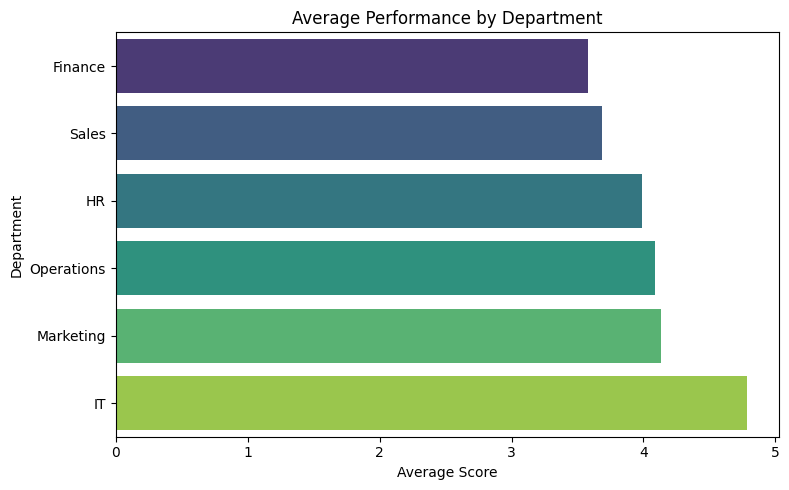

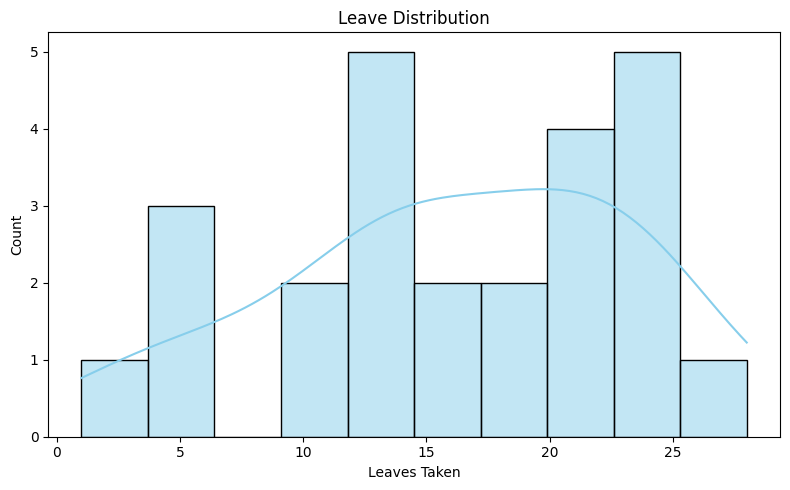

,Name,Department,PerformanceScore
7,Melissa Roberson,IT,4.96
8,Barbara Campbell,Sales,4.82
20,Jordan Ramirez,Operations,4.95


In [23]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",                   
    password="Nidhi@12",     
    database="hr_analytics"       
)

query = "SELECT * FROM employees"
df = pd.read_sql(query, conn)

print(df.head())

conn.close()

print("Missing values in each column:\n")
print(df.isnull().sum())

df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')
df['LeaveDate'] = pd.to_datetime(df['LeaveDate'], errors='coerce')

df['Tenure_Days'] = (df['LeaveDate'] - df['JoinDate']).dt.days
df['Tenure_Years'] = df['Tenure_Days'] / 365

df['Leave_Per_Year'] = df['LeaveTaken'] / df['Tenure_Years']

print(df.describe(include='all'))
print(df.info())
print(df.isnull().sum())

df['Tenure'] = (df['LeaveDate'] - df['JoinDate']).dt.days
df['Leave_Per_Month'] = df['LeaveTaken'] / (df['Tenure'] / 30)

dept_leave = df.groupby('Department')['LeaveTaken'].mean().sort_values()
print(dept_leave)

import matplotlib.pyplot as plt
plt.scatter(df['LeaveTaken'], df['PerformanceScore'], alpha=0.6)
plt.xlabel('Leaves Taken')
plt.ylabel('Performance Score')
plt.title('Leave Taken vs Performance')
plt.grid(True)
plt.show()

high_leave = df[df['LeaveTaken'] > df['LeaveTaken'].quantile(0.75)]
print(high_leave[['Name', 'Department', 'LeaveTaken']])

df.to_csv('data/cleaned_hr_data.csv', index=False)

import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('data/cleaned_hr_data.csv')

# Basic Overview
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

print("Summary Statistics:")
print(f"- Average Performance Score: {df['PerformanceScore'].mean():.2f}")
print(f"- Average Leave Taken: {df['LeaveTaken'].mean():.2f}")
print(f"- Total Employees: {df['EmployeeID'].nunique()}")
print(f"- Total Departments: {df['Department'].nunique()}")

import matplotlib.pyplot as plt
import seaborn as sns

dept_perf = df.groupby('Department')['PerformanceScore'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=dept_perf.values, y=dept_perf.index, palette='viridis')
plt.title("Average Performance by Department")
plt.xlabel("Average Score")
plt.ylabel("Department")
plt.grid(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['LeaveTaken'], bins=10, kde=True, color='skyblue')
plt.title("Leave Distribution")
plt.xlabel("Leaves Taken")
plt.ylabel("Count")
plt.grid(False)
plt.tight_layout()
plt.show()

top_performers = df[df['PerformanceScore'] > df['PerformanceScore'].quantile(0.9)]
top_performers[['Name', 'Department', 'PerformanceScore']]
